# Fitting data to models #

1. Build a model
2. Create a "fitness function", i.e. something that returns a scalar "distance" between the model and the data
3. Apply an "optimizer" to get the best-fit parameters

In [1]:
def gaussian_model(xaxis, amplitude, offset, width):
    amplitude = u.Quantity(amplitude, u.K)
    offset = u.Quantity(offset, u.km/u.s)
    width = u.Quantity(width, u.km/u.s)
   
    return amplitude*np.exp(-(xaxis-offset)**2/(2.*width**2))

In [2]:
from specutils.io import fits
spec = fits.read_fits_spectrum1d('gbt_1d.fits')

In [3]:
from astropy import units as u

In [4]:
%%bash
which conda

/Users/adam/anaconda/envs/esopython2016/bin/conda


In [5]:
import specutils
import numpy
import astropy
specutils.__version__, astropy.__version__, numpy.__version__, astropy.__path__

('0.2.dev0',
 '1.1.1',
 '1.10.4',
 ['/Users/adam/anaconda/envs/esopython2016/lib/python3.5/site-packages/astropy'])

In [6]:
spec.velocity

<Quantity [ 524.88543398, 524.63284567, 524.38025736,..., -508.95851885,
           -509.21110716,-509.46369547] km / s>

In [7]:
model = gaussian_model(spec.velocity, amplitude=5*u.K, offset=20*u.km/u.s, width=5*u.km/u.s)

In [8]:
%matplotlib inline
import pylab as pl

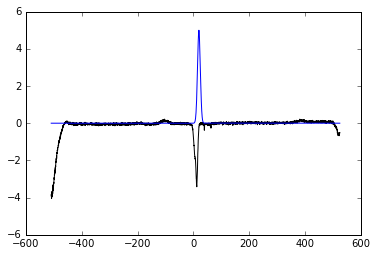

In [9]:
pl.plot(spec.velocity, spec.flux, 'k-')
pl.plot(spec.velocity, model)

In [10]:
def cost_function(params):
    return ((spec.flux*u.K-gaussian_model(spec.velocity, *params))**2).sum().value
    

In [11]:
from scipy.optimize import curve_fit, minimize

In [12]:
result = minimize(cost_function, (-5, 20, 20))

In [13]:
result

      fun: 874.080855382803
 hess_inv: array([[ 0.02026627, -0.00628146,  0.02600413],
       [-0.00628146,  0.09292427, -0.02506448],
       [ 0.02600413, -0.02506448,  0.09152247]])
      jac: array([ 0.,  0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 115
      nit: 17
     njev: 23
   status: 0
  success: True
        x: array([ -2.98664862,  10.56106783,   5.22460489])

In [14]:
best_fit_parameters = result.x

In [15]:
best_fit_model = gaussian_model(spec.velocity, *best_fit_parameters)
best_fit_model

<Quantity [-0.,-0.,-0.,..., -0.,-0.,-0.] K>

(-30, 50)

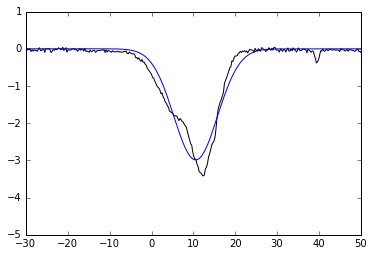

In [16]:
pl.plot(spec.velocity, spec.flux, 'k-')
pl.plot(spec.velocity, best_fit_model)
pl.xlim(-30,50)

## Fitting Tools ##

1. `scipy.optimize.curve_fit`: simpler fitter, lets you skip the cost-fitting section
2. `astropy.models`
3. `pyspeckit.specfit`

### scipy.optimize.curve_fit ###

In [17]:
from scipy.optimize import curve_fit

In [18]:
# curve_fit does not play well with units
#result_curve_fit = curve_fit(gaussian_model, spec.velocity, spec.flux*u.K, p0=(-5, 20, 20))

### astropy.modeling ###

### pyspeckit.specfit ###

In [19]:
import pyspeckit
sp = pyspeckit.Spectrum('gbt_1d.fits')

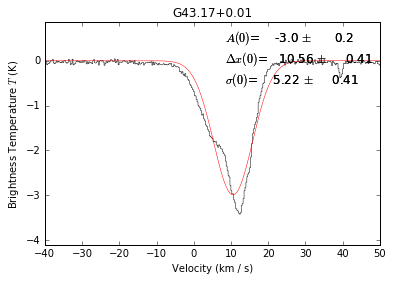

In [20]:
sp.plotter(xmin=-40, xmax=50)
sp.specfit(guesses=(-5, 20, 20))

# Exercise #

1. Get a better fit to the data (create a better model & fit it)

 - try using different optimizers in scipy.optimize